### Задача 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).  
Произвести расчет как с использованием intercept, так и без.

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

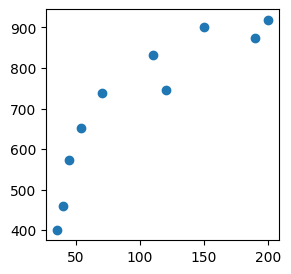

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])  
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

plt.figure(figsize = [3,3])
plt.scatter(zp,ks);

Для прямого расчета будем использовать следующие формулы:  
коэффициент лин. регрессии (без интерсепта):
$$ k = \frac{n*\sum_{i=1}^{n}\chi_i y_i - (\sum_{i=1}^{n}\chi_i)(\sum_{i=1}^{n}y_i)}{n*\sum_{i=1}^{n}\chi_i^2 -(\sum_{i=1}^{n}\chi_i)^2 }$$

In [4]:
n = len(ks)
k = (n*np.sum(zp*ks)-np.sum(zp)*np.sum(ks))/(n*np.sum(zp**2)-(np.sum(zp))**2)
k

2.6205388824027653

Формула коэффициента лин.регрессии с интерсептом:
$$ k = \frac{\bar{xy}-\bar{x}\bar{y}}{\bar{x^2}-\bar{х}^2}$$

для самого интерсепта:  
$$ a = \bar{y} - b \bar{x} \text{ , где } \bar{y}= \frac{\sum_{i=1}^{n}y_i}{n} ,\bar{x} = \frac{\sum_{i=1}^{n}x_i}{n} $$

In [5]:
b1= (np.mean(zp*ks) - np.mean(zp)*np.mean(ks) )/ (np.mean(zp**2) - np.mean(zp)**2)
b1

2.620538882402765

In [6]:
b0 = np.mean(ks) - b1*np.mean(zp)
b0

444.1773573243596

Посмотрим на графике наши линии регрессии.

функция прямой:
444.18+x*2.62
функция прямой:
0.00+x*2.62


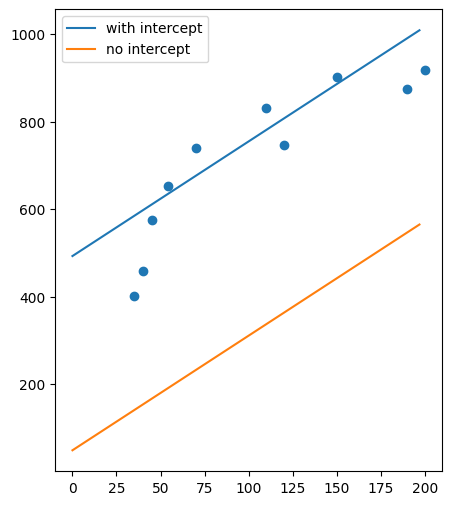

In [7]:
def Linear(iks:list, b1 :float, intercept:float = 0 )->list:
    print("функция прямой:")
    print(f"{intercept:.2f}+x*{b1:.2f}")
    return intercept+iks*b1

def manual_range(your_l:list)->np.arange:
    margin = (np.max(your_l) - np.min(your_l))/10
    return np.arange(np.min(your_l)-margin, np.max(your_l)+margin, step=margin//10)

plt.figure(figsize = [5,6])
plt.scatter(zp,ks)
plt.plot(Linear(manual_range(zp), k, b0),label = "with intercept")
plt.plot(Linear(manual_range(zp), k), label = "no intercept")
plt.legend(loc='best');

### Задача 2

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Запишем функцию потерь(minimal squarage error):
$$mse = \frac{\sum{(y-\^{y})^2}}{n}$$

функция, где $\^{y} = k*x $

In [8]:

def MSE_no_intercept(param:list, target:list, k:float):
    return np.sum(target - k*param)**2 /len(param)


1973420.6982399996

In [41]:
#формула градиента будет производной MSE, т.е. (2*/n) * sum((y_pred-y)*x)
coef = 0.1
n = len(zp)
mse_deriv = (2/n) * np.sum((coef*zp - ks)*zp)


mse_deriv

-159528.08000000002

In [69]:


alpha = 1e-9 
coef = 3
for i in range(1000000):
    stop_check = coef
    coef -= alpha * (2/n) * np.sum((coef*zp - ks)*zp)
    if i % 100000 == 0:
        print(f'step {i} : b1 = {coef} , mse = {MSE_no_intercept(zp,ks,coef)}')
    # print(f'step {i} : b1 = {b1} , mse = {MSE_no_intercept(zp,ks,b1)}');
    if coef-stop_check < alpha : break
coef


step 0 : b1 = 3.0000796238 , mse = 1645859.3894060324
step 100000 : b1 = 5.706072627048399 , mse = 172408.02291041432
step 200000 : b1 = 5.878136586237899 , mse = 129634.05098706791
step 300000 : b1 = 5.889077488899631 , mse = 127120.08368106392
step 400000 : b1 = 5.889773179918399 , mse = 126961.06229004641


5.8897841285684445

In [70]:
# сравним с коэффициэнтом из первой задачи по минимальным потерям:

MSE_no_intercept(zp,ks, b1)



3701745.6004301505

Получается, что коэффициент **5.88978** , полученный по градиентному спуску,  более точный, так как он  с меньшей средней квадратичной ошибкой(MSE)

функция прямой:
0.00+x*5.89


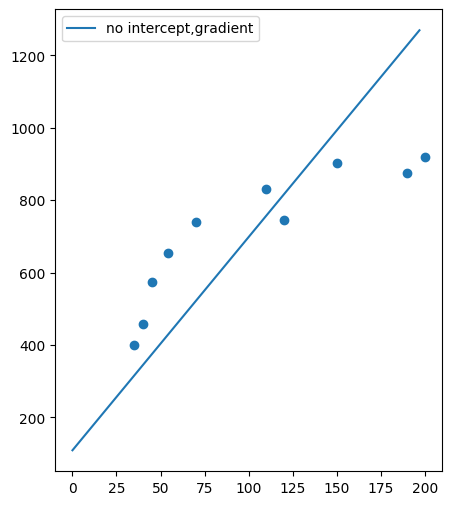

In [72]:
plt.figure(figsize = [5,6])
plt.scatter(zp,ks)
plt.plot(Linear(manual_range(zp), coef), label = "no intercept,gradient")
plt.legend(loc='best');

функция, где $\^{y} = a+b*x $

### Задача 3* 
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации). 

In [75]:
def MSE_intercept(x:list, y:list, k:float, a:float):
    return np.sum(x - k*y - a)**2 /len(x)

Попробуем записать формулы градиента, теперь они для каждого коэффициента будут отдельными.  

In [74]:
#для k1 формула прежняя, только добавилась  k0 как константа :
k0 = 1
k1 = 0.1
n = len(zp)
k_grad =  (2/n) * np.sum((k1*zp +k0- ks)*zp)

#для k0 тоже берем производную от функции потерь, но теперь k1 идет как константа, а производная берется по k0 :

i_grad =  (2/n) * np.sum((k1*zp +k0 - ks))

In [76]:
MSE_intercept(zp,ks,2.6 , 444.18)

47896197.904

In [113]:
alpha = 1e-5 
k0 = 10
k1 = 0.5
for i in range(2500000):
    k1_i = k1
    k0_i = k0
    k_grad =  (2/n) * np.sum((k1*zp +k0- ks)*zp)
    i_grad =  (2/n) * np.sum((k1*zp +k0 - ks))
    k1 -= alpha * k_grad
    k0 -=alpha * i_grad
    if i % 100000 == 0:
        print(f'step {i} : k1 = {k1} ,k0 = {k0} mse = {MSE_intercept(zp,ks,k1,k0)}')
    if (abs(k1_i - k1) < alpha) and (abs(k0_i - k0) < alpha) : break


print(f"k0={k0},k1={k1} , \n \
    gradients: {i_grad} and {k_grad} \n \
    last iteration diff: {abs(k0_i - k0)}, {abs(k1_i - k1)}")

step 0 : k1 = 1.9647880000000002 ,k0 = 10.012984 mse = 16988932.30474887
step 100000 : k1 = 4.544563237301646 ,k0 = 182.7767074557787 mse = 109399673.73573852
step 200000 : k1 = 3.7790265119968893 ,k0 = 286.78360164264876 mse = 82260809.14228408
step 300000 : k1 = 3.3180838924258853 ,k0 = 349.40791302477726 mse = 67782938.34864447
step 400000 : k1 = 3.0405425393935532 ,k0 = 387.11507086991264 mse = 59740951.59835541
step 500000 : k1 = 2.8734301931438644 ,k0 = 409.8191888294942 mse = 55143592.321373224
step 600000 : k1 = 2.772809020969025 ,k0 = 423.4897225366539 mse = 52464216.13966745
step 700000 : k1 = 2.7122233101162396 ,k0 = 431.72098226543227 mse = 50883102.090630755
step 800000 : k1 = 2.6757436281545983 ,k0 = 436.67716306818176 mse = 49942754.593159944
step 900000 : k1 = 2.6537785942003724 ,k0 = 439.66136341647814 mse = 49380785.63345297
step 1000000 : k1 = 2.64055307548233 ,k0 = 441.45820095595263 mse = 49043948.242470786
k0=442.2061613626566,k1=2.6350477561966965 ,     gradients

функция прямой:
442.21+x*2.64
функция прямой:
0.00+x*5.89


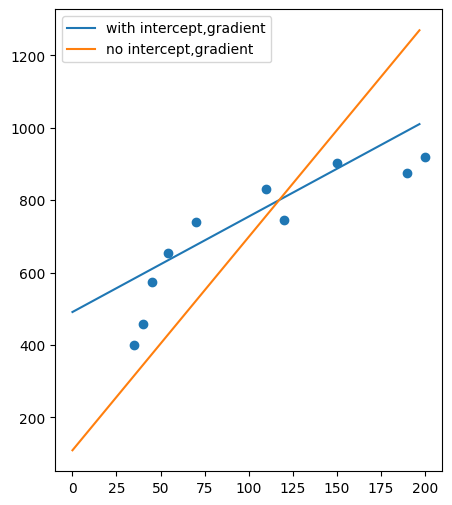

In [112]:
plt.figure(figsize = [5,6])
plt.scatter(zp,ks)
plt.plot(Linear(manual_range(zp), k1, k0), label = "with intercept,gradient")
plt.plot(Linear(manual_range(zp), coef), label = "no intercept,gradient")
plt.legend(loc='best');